###Load of the libraries


In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium # To display maps with coordinates and markers.
import geopy # For geocoding and reverse geocoding.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load of the Madrid Stations dataset


In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/bikestations.csv", sep=",", encoding='utf-8') #decimal is okey
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       216 non-null    int64  
 1   id               216 non-null    object 
 2   Gis_X            216 non-null    float64
 3   Gis_Y            216 non-null    float64
 4   Fecha de Alta    216 non-null    object 
 5   Distrito         216 non-null    object 
 6   Barrio           216 non-null    object 
 7   Calle            216 non-null    object 
 8   Nº Finca         216 non-null    object 
 9   Tipo de Reserva  216 non-null    object 
 10  Anclajes         216 non-null    int64  
 11  Unnamed: 10      0 non-null      float64
 12  Longitud         216 non-null    float64
 13  Latitud          216 non-null    float64
 14  DIRECCION        216 non-null    object 
 15  Year             216 non-null    int64  
 16  Locationlist     216 non-null    object 
 17  X               

In [4]:
df

,Unnamed: 0,id,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Anclajes,Unnamed: 10,Longitud,Latitud,DIRECCION,Year,Locationlist,X,Y,pickup cluster
0,0,001 a,440443.61,4474290.65,2019-12-04,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",2,BiciMAD,30,NaN,-3.701998,40.417111,"CALLE DE ALCALA, 2",2019,"[40.417110795315295, -3.70199802576925]",-0.064612,0.705412,1
1,1,001 b,440480.56,4474301.74,2020-02-06,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",6,BiciMAD,30,NaN,-3.701564,40.417213,"CALLE DE ALCALA, 6",2020,"[40.4172133427666, -3.7015635605662203]",-0.064604,0.705413,1
2,2,2,440134.83,4474678.23,2014-06-23,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,24,NaN,-3.705674,40.420580,"CALLE DE MIGUEL MOYA, 1",2014,"[40.4205801410996, -3.7056738708445]",-0.064676,0.705472,3
3,3,3,440012.98,4475760.68,2014-06-23,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,NaN,-3.707212,40.430323,"PLAZA DEL CONDE DEL VALLE DE SUCHIL, 2",2014,"[40.430322563576105, -3.7072122271712296]",-0.064703,0.705642,3
4,4,4,440396.40,4475565.36,2014-06-23,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,24,NaN,-3.702674,40.428591,"CALLE DE MANUELA MALASAÑA, 3",2014,"[40.4285905943729, -3.70267393708668]",-0.064624,0.705612,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,207,440874.74,4479385.27,2019-07-23,06 TETUÁN,06-05 VALDEACEDERAS,"AZUCENAS, CALLE, DE LAS",1,BiciMAD,18,NaN,-3.697391,40.463036,"CALLE DE LAS AZUCENAS, 1",2019,"[40.4630361532718, -3.6973907115820097]",-0.064532,0.706213,2
212,212,208,441615.82,4479765.37,2019-09-30,05 CHAMARTÍN,05-06 CASTILLA,"CASTELLANA, PASEO, DE LA",S/N,BiciMAD,24,NaN,-3.688685,40.466513,"PASEO DE LA CASTELLANA, S/N",2019,"[40.4665126608396, -3.68868514443985]",-0.064380,0.706274,2
213,213,209,441606.43,4479673.82,2019-09-30,05 CHAMARTÍN,05-05 NUEVA ESPAÑA,"CASTILLA, PLAZA, DE",9,BiciMAD,24,NaN,-3.688787,40.465687,"PLAZA DE CASTILLA, 9",2019,"[40.4656872797875, -3.68878747371191]",-0.064381,0.706259,2
214,214,210,440392.24,4474584.46,2019-07-16,01 CENTRO,01-06 SOL,"TRES CRUCES, CALLE, DE LAS",9,BiciMAD,27,NaN,-3.702631,40.419754,"CALLE DE LAS TRES CRUCES, 9",2019,"[40.4197538962774, -3.7026310219734104]",-0.064623,0.705458,3


In [0]:
df['Year'] = pd.DatetimeIndex(df['Fecha de Alta']).year
year = df['Year']

###Change the name of some columns

In [0]:
df = df.rename(columns = {'Número':'id','Número de Plazas':'Anclajes','LONGITUD': 'Longitud', 'LATITUD': 'Latitud'})

#### Replace the name of row data 90 ampliacion

In [0]:
df['id'] = df['id'].replace('090 ampliacion','90 b') 
# df['id'] = df['id'].replace('90','90 a')

##### Grouping Distrito and show values unique and not unique of "id"

In [8]:
df.groupby('Distrito')['id']\
      .agg(['nunique', 'unique'])\
      .sort_values(by='nunique', ascending=False)

,nunique,unique
Distrito,,
01 CENTRO,60,"[001 a, 001 b, 2, 4, 5, 6, 7, 9, 10, 11, 12, 1..."
04 SALAMANCA,38,"[87, 88, 89, 90, 90 b, 91, 92, 93, 94, 95, 96,..."
03 RETIRO,27,"[60, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 7..."
07 CHAMBERÍ,26,"[3, 8, 111 a, 111 b, 122, 123, 124, 125, 126, ..."
02 ARGANZUELA,22,"[46, 47, 118, 119, 120, 121, 162, 163, 164, 16..."
05 CHAMARTÍN,18,"[136, 137, 139, 140, 146, 147, 148, 149, 150, ..."
06 TETUÁN,11,"[133, 151, 152, 153, 154, 155, 156, 204, 205, ..."
09 MONCLOA-ARAVACA,11,"[14, 110, 112, 113, 114, 115, 116 a, 116 b, 11..."
15 CIUDAD LINEAL,2,"[188, 189]"


#### Name of values unique of Distrito

In [11]:
df['Distrito'].unique()

array(['01 \xa0CENTRO', '07 \xa0CHAMBERÍ', '09 \xa0MONCLOA-ARAVACA',
       '02 \xa0ARGANZUELA', '03 \xa0RETIRO', '04 \xa0SALAMANCA',
       '06 \xa0TETUÁN', '05 \xa0CHAMARTÍN', '13 \xa0PUENTE DE VALLECAS',
       '15 \xa0CIUDAD LINEAL'], dtype=object)

#### Analysis of total Barrio per Distrito


In [12]:
d_b = df.groupby(['Distrito'])['Barrio'].count()
d_b


Distrito
01  CENTRO                60
02  ARGANZUELA            22
03  RETIRO                27
04  SALAMANCA             38
05  CHAMARTÍN             18
06  TETUÁN                11
07  CHAMBERÍ              26
09  MONCLOA-ARAVACA       11
13  PUENTE DE VALLECAS     1
15  CIUDAD LINEAL          2
Name: Barrio, dtype: int64

#### Show graphic of the Bike Station by Distrito

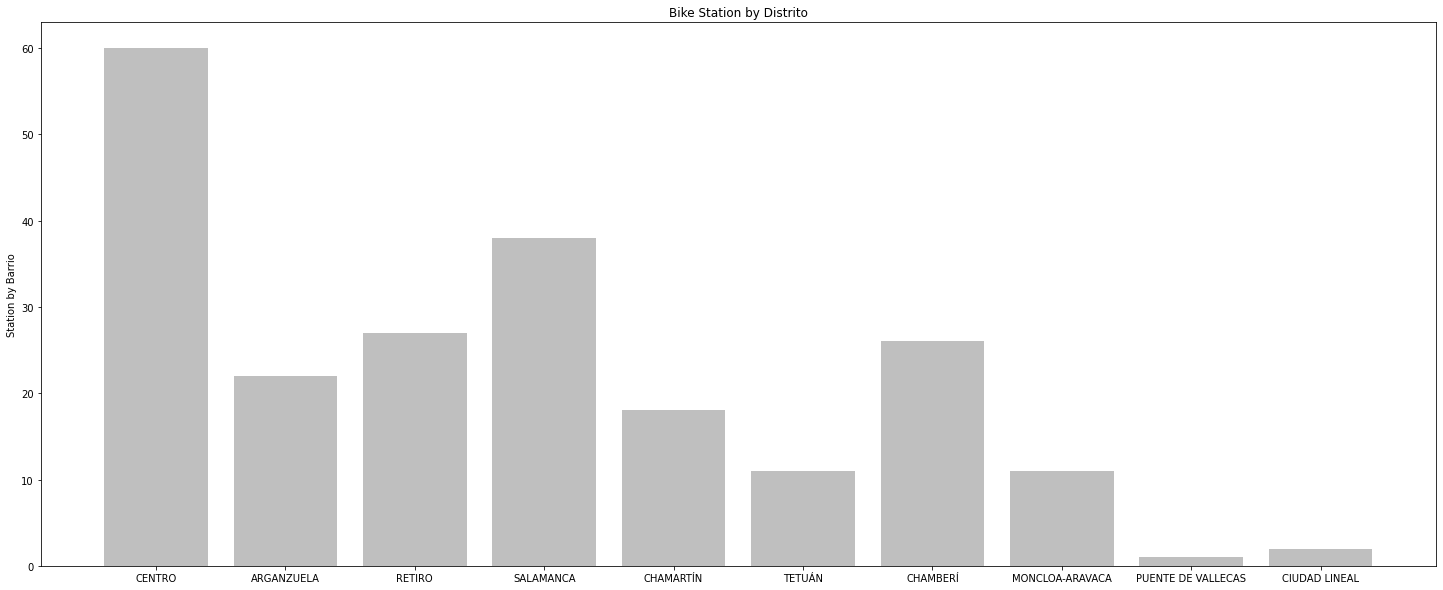

In [13]:
import matplotlib.pyplot as plt
# fig = plt.figure()
# fig.add_axes(langs)
langs = ['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN', 'TETUÁN', 'CHAMBERÍ', 'MONCLOA-ARAVACA', 'PUENTE DE VALLECAS', 'CIUDAD LINEAL']
# ax.bar(langs,aa)
# plt.show()
fig=plt.figure()
fig.set_figheight(10)
fig.set_figwidth(25)
fig.set_facecolor('white')
y_pos = np.arange(len(langs))
plt.bar(y_pos, d_b, align='center', alpha=0.5, width=0.8, color = 'gray')
plt.xticks(y_pos, langs)
plt.ylabel('Station by Barrio')
plt.title('Bike Station by Distrito')

plt.show()

#### Get of count, sum and mean of Anclajes by Distrito.

In [15]:
df.groupby('Distrito')['Anclajes'].agg(['count', 'sum', 'mean']).sort_values(by='sum', ascending=False)

,count,sum,mean
Distrito,,,
01 CENTRO,60,1419,23.650000
04 SALAMANCA,38,906,23.842105
03 RETIRO,27,664,24.592593
07 CHAMBERÍ,26,584,22.461538
02 ARGANZUELA,22,541,24.590909
05 CHAMARTÍN,18,426,23.666667
06 TETUÁN,11,258,23.454545
09 MONCLOA-ARAVACA,11,243,22.090909
15 CIUDAD LINEAL,2,51,25.500000


#### Display total Anclajes by Distrito.

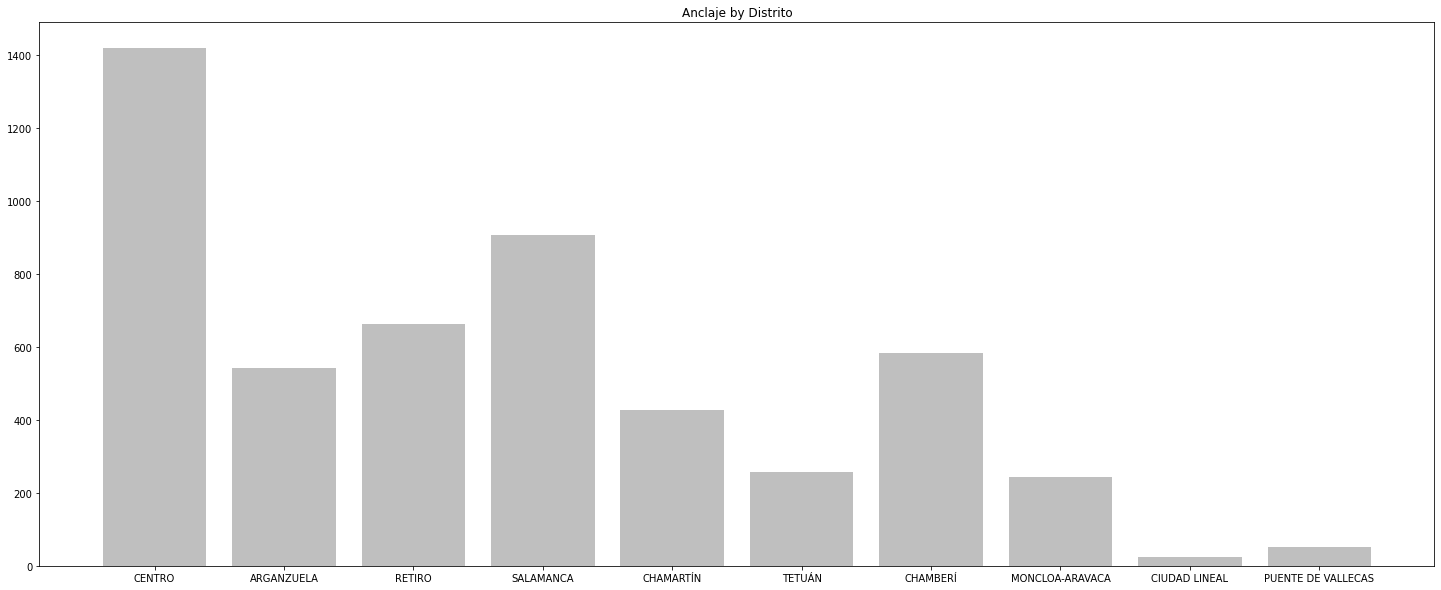

In [0]:
d_a = df.groupby('Distrito')['Anclajes'].sum()
langs = ['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN', 'TETUÁN', 'CHAMBERÍ', 'MONCLOA-ARAVACA', 'CIUDAD LINEAL', 'PUENTE DE VALLECAS']
# ax.bar(langs,aa)
# plt.show()
fig=plt.figure()
fig.set_figheight(10)
fig.set_figwidth(25)
fig.set_facecolor('white')
y_pos = np.arange(len(langs))
plt.bar(y_pos, d_a, align='center', alpha=0.5, width=0.8, color = 'gray')
plt.xticks(y_pos, langs)
# plt.ylabel('Anclaje by Disti')
plt.title('Anclaje by Distrito')

plt.show()

#### Display Year and Distrito by Barrio

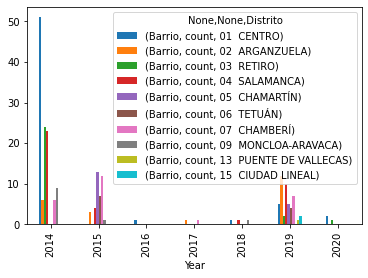

In [28]:
year_distrito = df.groupby(['Year','Distrito']).agg({'Barrio': ['count']})
# fig1=plt.figure(figsize=(50,8))
# rect = l,b,w,h
# fig1.add_axes(rect, frameon=False, axisbg='g')
# fig1.add_axes([2014, 2015, 2016, 2017, 2018, 2019, 2020])
# fig1.subplots_adjust(wspace=0.9, hspace=0.9)
# fig1.set_figheight(10)
fig1.set_figwidth(5)
fig1.set_label(200)
fig1.tight_layout()
year_distrito.unstack().plot.bar()
plt.show()


  #### Get of coordinates (Longitude and Latitude)








In [0]:
locations = df[['Latitud', 'Longitud']] # (Y, X)
locationlist = locations.values.tolist()
len(locationlist)
# locationlist 


216

In [0]:
df['Locationlist'] = locationlist

#### Scatterplot of X, Y

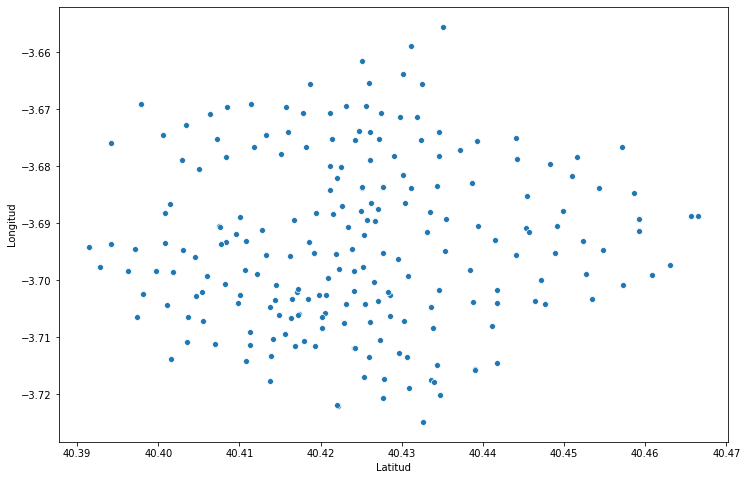

In [0]:
plt.figure(figsize = (12,8))
sns.scatterplot(df['Latitud'], df['Longitud'])

#### Bike map in Madrid

In [0]:
map = folium.Map(location=[40.417110795315295, -3.70199802576925], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Distrito'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(map)
map  

#### Bike Madrid map per Distrito

In [0]:
import folium.plugins
folium.plugins.MarkerCluster()
map2 = folium.Map(location=[40.417110795315295, -3.70199802576925], tiles='Stamen Terrain', zoom_start=11)

marker_cluster = folium.plugins.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Distrito'][point], icon=folium.Icon(color='darkblue', icon_color='green', icon='bicycle', angle=0, prefix='fa')).add_to(marker_cluster)
map2

#### Trying an animation that show the increase of stations per Distrito and Year.

In [0]:
import plotly.express as px
fig = px.scatter_geo(df, locations=df['Locationlist'], locationmode='country names', color= df['Distrito'].sort_values(), hover_name=df['Calle'],
                     size=df['Anclajes'], scope='europe', 
                     animation_frame=df['Year'].sort_values(), 
                     projection='stereographic')
# (df, locations="Locationlist", hover_name="Distrito", animation_frame="Year", projection="natural earth")
fig.show()

## Making a Model Machine Learning Clustering KMeans

#### Transformation is to convert the latitude and longitude to radians instead of degrees.

In [0]:
import numpy as np
df["X"] = np.radians(df["Longitud"]) # add new columns with transformation to radians
X = df['X']
df["Y"] = np.radians(df["Latitud"])
Y = df['Y']

In [0]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# Creates 5 clusters using hierarchical clustering.
model = AgglomerativeClustering(n_clusters =5, affinity='euclidean', linkage='ward')

df['pickup cluster'] = model.fit_predict(df[['X','Y']])

# creates 5 clusters using k-means clustering algorithm.
kmeans = KMeans(5)
clusters = kmeans.fit_predict(df[['X','Y']])
df['pickup cluster'] = kmeans.predict(df[['X','Y']])


#### Display Clustering

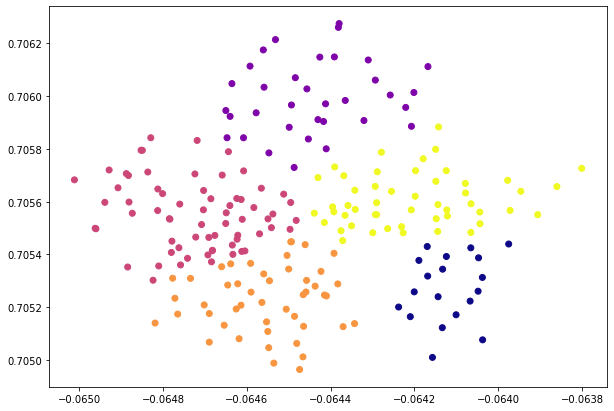

In [32]:
figure = plt.figure(figsize=(10,7))
plt.scatter(X, Y, c=clusters, cmap="plasma",linewidths=1)

# figure.set_figheight(10)
# figure.set_figwidth(10)

In [33]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.06411811,  0.70527156],
       [-0.06444156,  0.70599497],
       [-0.06472004,  0.70555345],
       [-0.06455202,  0.70522903],
       [-0.06420417,  0.70560685]])

#### Displaying clustering with its centroids


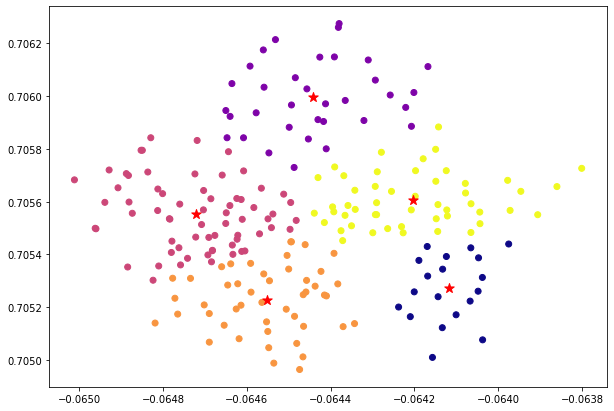

In [34]:
K = 5
figure = plt.figure(figsize=(10,7))
plt.scatter(X, Y, c=clusters, cmap="plasma", linewidths=1);
for k in range(K):
  plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='*', color='red')

plt.show()

In [35]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0])

In [36]:
labels = kmeans.predict(df[["X", "Y"]])
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 4, 4, 0, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

#### Metrics: Sum of Square Error

In [37]:
sse = kmeans.inertia_
sse

6.78710914177143e-06